<a href="https://colab.research.google.com/github/wais-ves/-Customer-Churn-Prediction-Telecom-/blob/main/customer_churn_prediction_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df_modeling = df.drop('customerID', axis=1)
df_encoded = pd.get_dummies(df_modeling)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [ ]:
probs = rf.predict_proba(X_test)[:, 1]

test_ids = df.loc[X_test.index, 'customerID']

results = pd.DataFrame({
    'CustomerID': test_ids.values,
    'Churn_Prob': probs
})

high_risk = results[results['Churn_Prob'] > 0.8].sort_values(by='Churn_Prob', ascending=False)

print(f"Found {len(high_risk)} high-risk customers.")
high_risk.head()

Found 72 high-risk customers.


,CustomerID,Churn_Prob
1081,4871-JTKJF,1.00
286,6502-MJQAE,1.00
242,0841-NULXI,0.99
234,7294-TMAOP,0.99
417,9282-IZGQK,0.99


In [ ]:
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[947  89]
 [200 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



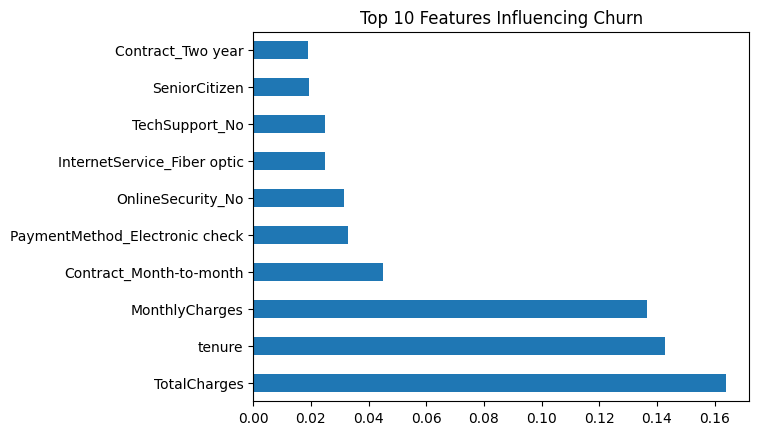

In [ ]:
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.show()